<a href="https://colab.research.google.com/github/Darkunquie/image-classification-using-cnn/blob/main/image_classifIcation_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

##Load Dataset

In [6]:
usecols = range(10)

# Use genfromtxt to handle missing values and select specific columns
X_train = np.genfromtxt('/content/input.csv', delimiter=',', usecols=usecols)
Y_train = np.loadtxt('/content/labels.csv', delimiter=',')

X_test = np.genfromtxt('/content/input_test.csv', delimiter=',', usecols=usecols)
Y_test = np.loadtxt('/content/labels_test.csv', delimiter=',')

In [17]:
import numpy as np

# Use invalid_raise=False to skip problematic lines
X_train = np.genfromtxt('/content/input.csv', delimiter=',', invalid_raise=False)
X_test = np.genfromtxt('/content/input_test.csv', delimiter=',', invalid_raise=False)

# Print shapes for debugging
print("X_train shape before reshape:", X_train.shape)
print("X_test shape before reshape:", X_test.shape)

# Reshape to the desired image format (num_images, height, width, channels)
# Adjust reshape parameters based on the actual shape of X_train and X_test
X_train = X_train.reshape(X_train.shape[0], 100, 100, 3)
X_test = X_test.reshape(X_test.shape[0], 100, 100, 3)

Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

<ipython-input-17-b3d43fd0081f>:4: ConversionWarning: Some errors were detected !
    Line #553 (got 7479 columns instead of 30000)
  X_train = np.genfromtxt('/content/input.csv', delimiter=',', invalid_raise=False)


X_train shape before reshape: (552, 30000)
X_test shape before reshape: (400, 30000)


In [18]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (552, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


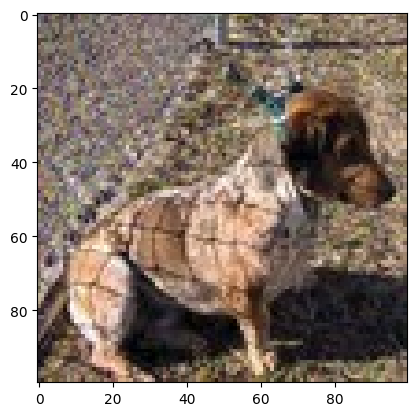

In [19]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [20]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [29]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [30]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 944ms/step - accuracy: 1.0000 - loss: 2.3670e-19
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 621ms/step - accuracy: 1.0000 - loss: 1.8233e-19
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 715ms/step - accuracy: 1.0000 - loss: 1.4141e-19
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 925ms/step - accuracy: 1.0000 - loss: 5.8624e-20
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 636ms/step - accuracy: 1.0000 - loss: 3.1819e-19


In [32]:
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


In [33]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.7916 - loss: 17.9552


[43.04893493652344, 0.5]

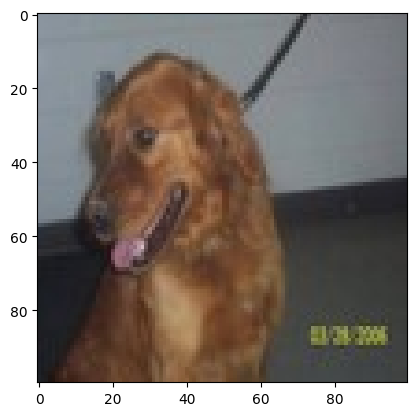

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Our model says it is a : dog


In [41]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)